### **Lista 3**
##### Rafał Głodek
***

**Zadanie 1**

In [1]:
import numpy as np
from scipy.linalg import solve

In [36]:
def Lu(mat):
    mat = mat.astype(float)
    n = len(mat)
    L, U = np.zeros((n,n)), np.zeros((n,n))

    for i in range(n):
        for k in range(i, n):
            sum_ = 0
            for j in range(i):
                sum_ += (L[i][j] * U[j][k])
            U[i][k] = mat[i][k] - sum_

        for k in range(i, n):
            if (i == k):
                L[i][i] = 1 
            else:
                sum_ = 0
                for j in range(i):
                    sum_ += (L[k][j] * U[j][i])
                L[k][i] = (mat[k][i] - sum_) / U[i][i]
    return L, U


In [37]:
def dokladnosc_maszynowa(x_0):
    x = x_0
    while x + 1 != 1:
        x /= 2
    return x

In [38]:
A = np.array([
    [1, 1/2, 1/3, 1/4, 1/5],
    [1/2, 1/3, 1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5, 1/6, 1/7],
    [1/4, 1/5, 1/6, 1/7, 1/8],
    [1/5, 1/6, 1/7, 1/8, 1/9]
])

b = np.array([5,4,3,2,1])

augmented_matrix = np.column_stack((A, b))

In [39]:
def iteracyjne_poprawianie_rozwiazan(A, b):
    L,U = Lu(A)#rozkład LU
    y = solve(L, b)#rozwiązujemy za pomocą LU
    x =  [1,1,1,1,1]
    x_0 = x
    Ax = np.dot(A, x)
    r = (b.astype(np.float64) - Ax.astype(np.float64))#reszty
    u = np.finfo(np.float64).eps * 10**2
    while np.linalg.norm(r,np.inf) > np.linalg.norm(np.dot(A,x), np.inf) * u:
        delta_x = solve(A, r)
        x += delta_x
        r = b.astype(np.float64) - np.dot(A, x).astype(np.float64)
    return x, x_0

In [40]:
print(iteracyjne_poprawianie_rozwiazan(A, b))

(array([   -95.        ,   2160.00000001, -10710.00000003,  17920.00000004,
        -9450.00000002]), [1, 1, 1, 1, 1])


In [41]:
from scipy.linalg import lu, solve

def iterative_refinement(A, b):
    P, L, U = lu(A)
    y = solve(L, np.dot(P, b))  
    x = solve(U, y)              
    x_0 = x.copy()            

    r = b - np.dot(A, x)
    u = np.finfo(np.float64).eps * 10**2
    
    while np.linalg.norm(r, np.inf) > np.linalg.norm(np.dot(A, x), np.inf) * u:
        delta_x = solve(A, r)
        x += delta_x 
        r = b - np.dot(A, x)
        
    return x, x_0


In [49]:
x_nowe, x_stare = iteracyjne_poprawianie_rozwiazan(A,b)
print(f"Metoda 1: \nRozwiązanie początkowe: {x_stare}\nRozwiązanie końcowe: {x_nowe}")

Metoda 1: 
Rozwiązanie początkowe: [1, 1, 1, 1, 1]
Rozwiązanie końcowe: [   -95.           2160.00000001 -10710.00000003  17920.00000004
  -9450.00000002]


In [50]:
x_nowe2, x_stare2 = iterative_refinement(A,b)
print(f"Metoda 2: \nRozwiązanie początkowe: {x_stare2}\nRozwiązanie końcowe: {x_nowe2}")

Metoda 2: 
Rozwiązanie początkowe: [   -95.           2160.00000002 -10710.00000008  17920.00000012
  -9450.00000006]
Rozwiązanie końcowe: [   -95.           2160.         -10710.00000001  17920.00000002
  -9450.00000001]


***
**Zadanie 2**

In [6]:
def generate_matrix_A(n):
    mat = np.zeros((n,n))
    for i in range(n):
        mat[i][i] = 4
        if i - 1 >= 0:
            mat[i][i-1] = -1
        if i + 1 < n:
            mat[i][i+1] = -1
        mat[0][-1] = 1
        mat[-1][0] = 1
    return mat
                     

In [7]:
def generate_matrix_b(n):
    b = np.zeros(n)
    b[-1] = 100
    return b

In [8]:
def ldu(mat):
    n = len(mat)
    l, d, u = mat.copy(), mat.copy(), mat.copy()
    for i in range(n):
        for j in range(n):
            if j > i:
                l[i][j] = 0
                d[i][j] = 0
            if j == i:
                l[i][j] = 0
                u[i][j] = 0
            if i > j:
                u[i][j] = 0
                d[i][j] = 0
    return l, d, u 

In [9]:
n = 20
A,b = generate_matrix_A(n), generate_matrix_b(n)

In [44]:
def gauss_siedel(A, b, error):
    L, D, U = ldu(A)
    n = len(A)
    N = np.linalg.inv(D + L)
    M = np.dot(-N, U)
    x_0 = np.zeros(n)
    x = np.dot(M, x_0) + np.dot(N, b)
    while np.linalg.norm(x-x_0, np.inf) > error:
        x_0 = x
        x = np.dot(M, x_0) + np.dot(N, b)
    if_converges = max(np.abs(np.linalg.eig(M)[0])) < 1
    return x, if_converges



In [45]:
error = 10**(-4)

In [46]:
result, convergence = gauss_siedel(A, b, error)
print(f"Rozwiązanie dla błędu {error}: \nx = {result}")
print(f"Zbieżność rozwiązania: {convergence}")

Rozwiązanie dla błędu 0.0001: 
x = [-7.73502629e+00 -2.07259392e+00 -5.55349816e-01 -1.48805513e-01
 -3.98723081e-02 -1.06837493e-02 -2.86270063e-03 -7.67057804e-04
 -1.99571861e-04 -1.33488979e-05  1.75233293e-04  7.48182125e-04
  2.84927656e-03  1.06743492e-02  3.98661297e-02  1.48801747e-01
  5.55347733e-01  2.07259300e+00  7.73502629e+00  2.88675131e+01]
Zbieżność rozwiązania: True


***
**Zadanie 3**

In [13]:
from ipynb.fs.full.lista2 import gauss,rozwiazanie
import cProfile

In [14]:
augmented_matrix = np.column_stack((A, b))

In [16]:
print(f"Rozwiązanie metodą eliminacji Gaussa: \nx = {rozwiazanie(gauss(augmented_matrix)[0])}")

Rozwiązanie metodą eliminacji Gaussa: 
x = [-7.73502692e+00 -2.07259421e+00 -5.55349941e-01 -1.48805549e-01
 -3.98722562e-02 -1.06834753e-02 -2.86164518e-03 -7.63105381e-04
 -1.90776345e-04 -3.63138871e-20  1.90776345e-04  7.63105381e-04
  2.86164518e-03  1.06834753e-02  3.98722562e-02  1.48805549e-01
  5.55349941e-01  2.07259421e+00  7.73502692e+00  2.88675135e+01]


In [17]:
def main():
    gauss(augmented_matrix)

if __name__ == '__main__':
    cProfile.run('main()')

         148 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 2449507993.py:1(main)
       20    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argmax)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
       20    0.000    0.000    0.000    0.000 fromnumeric.py:1149(_argmax_dispatcher)
       20    0.000    0.000    0.000    0.000 fromnumeric.py:1153(argmax)
       20    0.000    0.000    0.000    0.000 fromnumeric.py:51(_wrapfunc)
        1    0.001    0.001    0.001    0.001 lista2.ipynb:126(gauss)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
       20    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.array}
       20  

In [18]:
def main():
    gauss_siedel(A,b, error)

if __name__ == '__main__':
    cProfile.run('main()')

         265 function calls (264 primitive calls) in 0.002 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.002    0.002 1615432520.py:1(main)
        1    0.000    0.000    0.000    0.000 1713615400.py:1(ldu)
        1    0.000    0.000    0.002    0.002 2136754797.py:1(gauss_siedel)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
       25    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(dot)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(eig)
        1    0.000    0.000    0.001    0.001 <__array_function__ internals>:177(inv)
       12    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(norm)
        1    0.000    0.000    0.002    0.002 <string>:1(<module>)
       12    0.000    0.000    0.000    0.000 _methods.py:39(_amax)
        1    0.000    0.000    0.000    0.000 _method

Złożoność obliczeniowa:
1. Gauss-Seidel:
- ldu() ma złożoność $O(n^2)$ - dwie pętle of 1 do n
- każda operacja na macierzach ma złożoność $O(n^2)$, ponieważ wykonujemy je na każdym wierszu, iterując po każdej kolumnie, całkowita złożonośc tych operacji zależy jednak od liczby iteracji $k$, którą ustalimy (wybierając odpowiednią wielkość błędu)
- całkowity nakład obliczeń w tym wypadku wynosi $O(k\cdot n^2)$
- dla szybko zbiegających rozwiązań $k$ będzie małe, a co za tym idzie - złożoność będzie rzędu $O(n^2)$
- w najgroszym wypadku $(k=n)$ osiągniemy nakład rzędu $O(n^3)$

2. Gauss
- Dla każdego wiersza wykonujemy operacje o złożoności $O(n)$, a dla każdego kroku wiersza $k$ (których jest $n$) wykonujemy $n$ takich kroków. 
- Całkowita złożoność tej metody jest równa $O(n^3)$ (dla każdej macierzy)

3. Porównanie 
- Metoda Gaussa-Seidla jest bardziej efektywna dla układów równań (w szczególności dużych macierzy) z szybko zbiegającymi rozwiązaniami

***
Zadanie 4

In [19]:
def upper_bidiagonal_matrix(n):
    mat = np.zeros((n,n))
    mat[0,0] = 0.025
    mat[0][1] = 5
    for i in range(1,n-1):
        mat[i][i] = mat[i-1][i-1] + 0.025
        mat[i][i+1] = 5
    mat[n-1][n-1] = mat[n-2][n-2] + 0.025
    return mat

In [20]:
def x_k(k, n, B):
    x = np.ones(n)
    for i in range(k):
        x = np.dot(x, B)
    return x

In [21]:
def eta(k, n, B):
    return np.linalg.norm(x_k(k, n, B), 2) / np.linalg.norm(x_k(0, n, B), 2)

In [22]:
etas = []
B = upper_bidiagonal_matrix(20)
for k in range(1, 100):
    etas.append(eta(k,20, B))

In [23]:
ks = np.linspace(1,k+1,k)

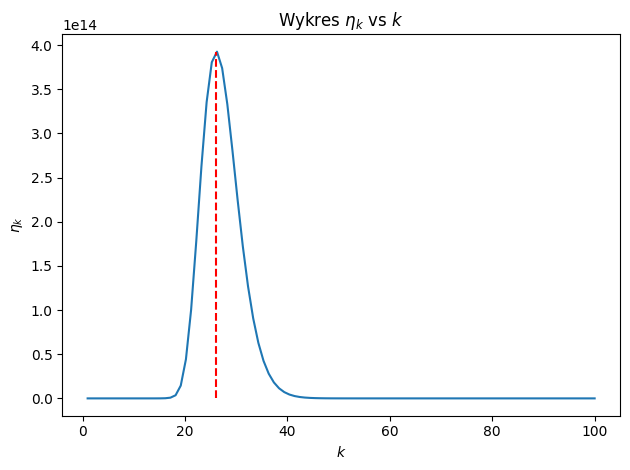

In [41]:
import matplotlib.pyplot as plt
plt.plot(ks, etas)
plt.xlabel("$k$")
plt.ylabel("$\eta_k$")
plt.vlines(26,0,max(etas),linestyle="--",color="r")
plt.title("Wykres $\eta_k$ vs $k$")
plt.tight_layout()
plt.show()

In [39]:
print(f"Indeks maksimum to: {etas.index(max(etas))+1}, za tym punktem wartości maleją")

Indeks maksimum to: 26, za tym punktem wartości maleją


In [43]:
for k,eta in enumerate(etas):
    if eta < 1:
        print(f"Najmniejsze szukane k to: {k}")
        break

Najmniejsze szukane k to: 86
